# Exploratory Data analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import numpy as np
import seaborn as sns

In [2]:
df1=pd.read_csv("heart_disease_data.csv")
df1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [13]:
len(df1)

1025

In [23]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [30]:
#Dropping extra columns:
df2=df1.drop(['cp','thal','ca','slope','oldpeak'],axis='columns')
df2.head(10)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,target
0,52,1,125,212,0,1,168,0,0
1,53,1,140,203,1,0,155,1,0
2,70,1,145,174,0,1,125,1,0
3,61,1,148,203,0,1,161,0,0
4,62,0,138,294,1,1,106,0,0
5,58,0,100,248,0,0,122,0,1
6,58,1,114,318,0,2,140,0,0
7,55,1,160,289,0,0,145,1,0
8,46,1,120,249,0,0,144,0,0
9,54,1,122,286,0,0,116,1,0


In [31]:
#Checking if any null values are present in the dataset, and replacing them with the mean of the column
df2.isnull().sum()


age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
target      0
dtype: int64

In [32]:
# fill missing values with the mean of the column
df2.fillna(df2.mean(), inplace=True)

In [16]:
#now we'll have to replace the outliers in the dataser by replacing the outliers with the mean of that column
#the threshold value is taken to be 3 as it's the standard value
def handle_outliers(df, columns, threshold=3):
    for col in columns:
        if col != 'target':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (threshold * iqr)
            upper_bound = q3 + (threshold * iqr)
            df[col] = np.where(df[col] > upper_bound, upper_bound,
                               np.where(df[col] < lower_bound, lower_bound, df[col]))
    return df

In [17]:
#calling the above function for the current dataset, df2
df2 = handle_outliers(df2, df2.columns)

# Linear Regression Model

In [20]:
from sklearn.model_selection import train_test_split

# split dataset into training and testing sets
X = df2.drop('target', axis=1)
y = df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

# build linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
lr.coef_

array([ 0.00000000e+00, -2.98190973e-01, -4.56087179e+02, -4.27418123e+07,
       -7.45058060e-09,  8.85850834e-02,  0.00000000e+00, -3.72821304e-01])

In [37]:
lr.intercept_

10323250975.478722

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

# evaluate performance of model
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-squared:', r2)
print('Mean Squared Error:', mse)

R-squared: 0.25897080535840233
Mean Squared Error: 0.18431210836111167


Text(0.5, 1.0, 'Residual plot')

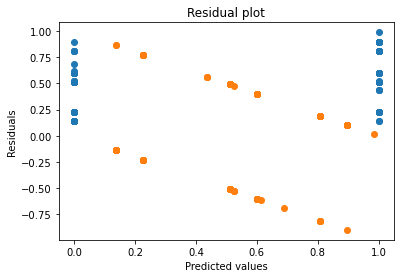

In [27]:
import matplotlib.pyplot as plt

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

# Plot residuals
plt.scatter(y_pred, y_test-y_pred)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')

In [42]:
# Set threshold value
threshold = 0.5

# Convert predicted values to binary classes
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Create confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_class)

print(confusion_matrix)


[[38 40]
 [12 78]]


# Linear regression model using all variables
As we can see by the r sqaured value, MSE, and the confusion matrix, that only taking the exisiting variables into account is not giving us an accurate model.
So, we'll have to include all the variables that we first dropped from df1.

In [43]:
#applying linear regression model on df1
from sklearn.model_selection import train_test_split

# split dataset into training and testing sets
X = df1.drop('target', axis=1)
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression

# build linear regression model
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [45]:
from sklearn.metrics import r2_score, mean_squared_error

# evaluate performance of model
y_pred = lr2.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-squared:', r2)
print('Mean Squared Error:', mse)

R-squared: 0.409608010607855
Mean Squared Error: 0.1475944852005681


# Data cleaning on df1
As we can see, the r squared value increased from the previous value of 0.259, but still it is low. Hence, we'll now first clean the data and we'll have to remove the outliers present in the df2 dataset.

In [46]:
#calling handle_outliers function on df1
df1 = handle_outliers(df1, df1.columns)

In [47]:
#applying linear regression model on df1 with outliers replaced by mean value of the column

# split dataset into training and testing sets
X = df1.drop('target', axis=1)
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

# build linear regression model
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [49]:
from sklearn.metrics import r2_score, mean_squared_error

# evaluate performance of model
y_pred = lr2.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-squared:', r2)
print('Mean Squared Error:', mse)

R-squared: 0.4111221310990536
Mean Squared Error: 0.14721596408502893


# Conclusion
The r squared value even after replacing the outliers with the mean value remains around 0.411 which is low, hence by this observation it is safe to say that Linear regression model is not the best model for the above predicition.